Challenge Set 2  
Topic:        Explore Movie Data  
Date:         07/15/2016  
Name:         Avi Grunwald  
Worked with:  

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

/home/avi/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data_start = pd.read_csv('../movies_list_all_df.csv', index_col=0)
movie_data = pd.read_csv('/home/avi/Documents/metis/ds/metisgh/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [3]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
data_start.head()

,Title,Domestic Total Gross,Distributor,Release Date,Runtime,MPAA Rating,Production Budget,Opening Weekend Gross,Opening Weekend Theaters,Actors,Series
0,Star Wars: The Force Awakens,"$936,662,225",Buena Vista,"December 18, 2015",2 hrs. 16 min.,PG-13,$245 million,"$247,966,675","4,134",15,Yes
1,Marvel's The Avengers,"$623,357,910",Buena Vista,"May 4, 2012",2 hrs. 22 min.,PG-13,$220 million,"$207,438,708","4,349",13,Yes
2,Jurassic World,"$652,270,625",Universal,"June 12, 2015",2 hrs. 4 min.,PG-13,$150 million,"$208,806,270","4,274",7,Yes
3,Avengers: Age of Ultron,"$459,005,868",Buena Vista,"May 1, 2015",2 hrs. 21 min.,PG-13,$250 million,"$191,271,109","4,276",19,Yes
4,The Dark Knight,"$533,345,358",Warner Bros.,"July 18, 2008",2 hrs. 30 min.,PG-13,$185 million,"$158,411,483","4,366",11,Yes


In [5]:
data_start['rdm'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%B'))
data_start['rdy'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%Y'))
data_start['Release Date'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))

data_start['Domestic Total Gross'] = data_start['Domestic Total Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))
data_start['Opening Weekend Gross'] = data_start['Opening Weekend Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))

data_start['Runtime'].fillna(value='0 hrs. 0 min.', inplace=True)
data_start['Runtime'] = data_start['Runtime'].str.replace(' min.', '').str.split(' hrs. ').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data_start = data_start[data_start['Runtime']!=0]

In [6]:
data_start.columns = [ 'title', 'dtg', 'dist', 'rd', 'run', 'rating', 'pb', 'owg', 'owt', 'act', 'series', 'rdm', 'rdy']
data_start.head()

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
0,Star Wars: The Force Awakens,936662225,Buena Vista,2015-12-18,136,PG-13,$245 million,247966675,"4,134",15,Yes,December,2015
1,Marvel's The Avengers,623357910,Buena Vista,2012-05-04,142,PG-13,$220 million,207438708,"4,349",13,Yes,May,2012
2,Jurassic World,652270625,Universal,2015-06-12,124,PG-13,$150 million,208806270,"4,274",7,Yes,June,2015
3,Avengers: Age of Ultron,459005868,Buena Vista,2015-05-01,141,PG-13,$250 million,191271109,"4,276",19,Yes,May,2015
4,The Dark Knight,533345358,Warner Bros.,2008-07-18,150,PG-13,$185 million,158411483,"4,366",11,Yes,July,2008


**Challenge 1**

/home/avi/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


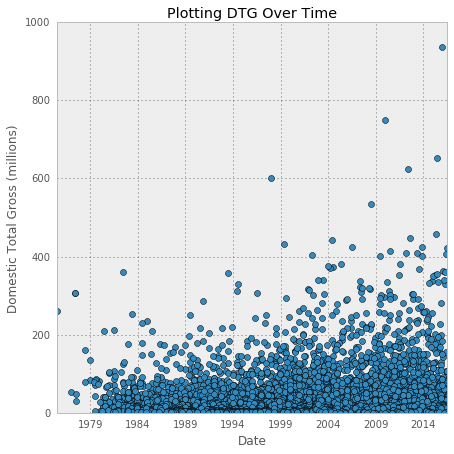

In [7]:
fig = plt.figure(figsize=(7,7))
plt.plot_date(data_start.rd, data_start.dtg/1000000)
plt.xlabel('Date')
plt.ylabel('Domestic Total Gross (millions)')
plt.title('Plotting DTG Over Time')
plt.show()

**Challenge 2**

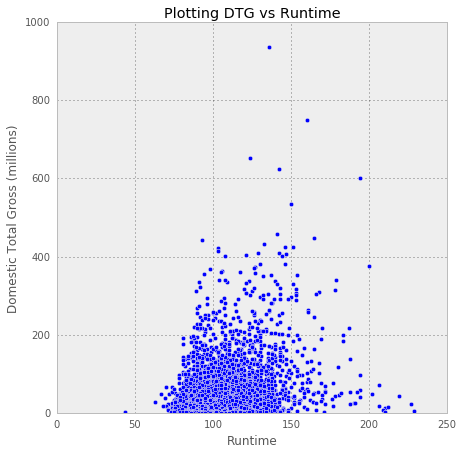

In [8]:
fig = plt.figure(figsize=(7,7))
plt.scatter(data_start.run, data_start.dtg/1000000)
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross (millions)')
plt.ylim(ymin=0)
plt.title('Plotting DTG vs Runtime')
plt.show()

**Challenge 3**

In [9]:
data_start.groupby( ['rating'] ).mean()

,dtg,run,owg,act
rating,,,,
G,56985362.45,88.03,13138402.23,1.85
NC-17,20350754.00,97.00,8112627.00,0.00
PG,56485743.77,102.84,12846046.63,2.83
PG-13,60713008.95,108.66,17729359.66,4.05
R,35706745.63,108.72,9531331.11,3.26
Unrated,849163.00,112.50,706894.50,0.00


**Challenge 4**

In [10]:
rating_df = pd.pivot_table(data_start, values=['dtg'], index=['rating', 'rd'])
rating_df2 = pd.pivot_table(data_start, index=['rating', 'rd', 'dtg'])

In [11]:
rating_df.index.levels[0]

Index(['G', 'NC-17', 'PG', 'PG-13', 'R', 'Unrated'], dtype='object', name='rating')

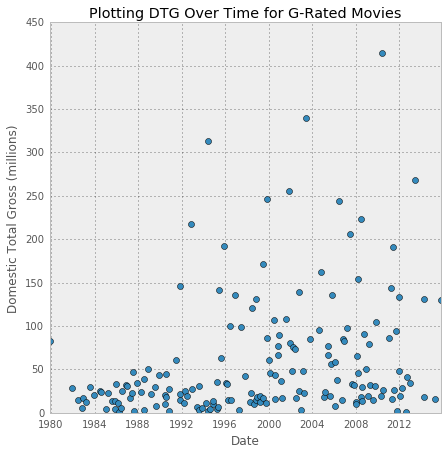

In [12]:
fig = plt.figure(figsize=(7,7))
plt.plot_date(rating_df.ix['G'].index, rating_df.ix['G'].values/1000000)
plt.xlabel('Date')
plt.ylabel('Domestic Total Gross (millions)')
plt.title('Plotting DTG Over Time for G-Rated Movies')
plt.show()

In [13]:
rating_df.query('rating == ["G"]').head()

dtg
rating rd                  
G      1979-12-07  82258456
       1981-12-18  28040000
       1982-07-02  14665733
       1982-11-19   5789860
       1982-12-17  17200000

Notes: check fascet grid plot from seaborn

/home/avi/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


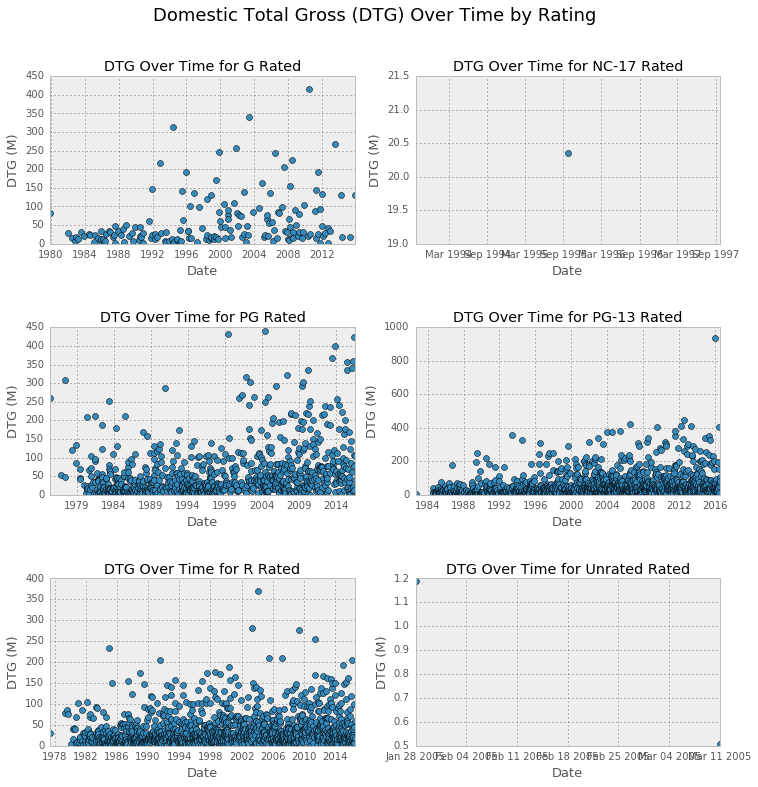

In [14]:
fig = plt.figure(figsize=(12,12))
# fig = plt.subplots(3, 2, sharex='col', sharey='row')
for plot_num, r in enumerate(rating_df.index.levels[0]):
    plt.subplot(3, 2, plot_num+1)
    plt.plot_date(rating_df.ix[r].index, rating_df.ix[r].values/1000000)
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('DTG (M)', fontsize=13)
    plt.title('DTG Over Time for {} Rated'.format(r))
plt.suptitle('Domestic Total Gross (DTG) Over Time by Rating', fontsize=18)
plt.show()

**Challenge 5**

In [15]:
dir_df = movie_data.groupby( ['Director'] ).mean()

In [16]:
dir_df.sort_values('DomesticTotalGross', ascending=False, inplace=True)

In [17]:
dir_df2 = movie_data.groupby(['Director'])['DomesticTotalGross'].mean()

In [18]:
dir_df2.sort_values(axis=0, ascending=False, inplace=True)

In [19]:
dir_df.head()

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.00,424668047.00,146.00
Shane Black,200000000.00,409013994.00,129.00
Chris BuckJennifer Lee,150000000.00,400738009.00,108.00
Pierre CoffinChris Renaud,76000000.00,368061265.00,98.00
Zack Snyder,225000000.00,291045518.00,143.00


In [20]:
dir_df2.head(1)

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

In [21]:
dir_df.head(1)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.00,424668047.00,146.00


**Challenge 6**

In [22]:
month_df = data_start.groupby( ['rdm'] ).mean()

In [23]:
month_df.sort_index()

,dtg,run,owg,act
rdm,,,,
April,31685143.57,102.73,9847949.71,3.10
August,34886371.73,102.34,9696803.47,2.93
December,65695499.19,117.93,11329473.66,4.10
February,39068207.76,103.82,12789196.57,3.27
January,30190057.82,100.63,10241870.25,3.02
July,67804676.45,105.45,17436662.29,3.48
June,81270926.38,108.39,20405987.03,3.68
March,40639045.94,104.69,12105487.21,3.03
May,80722494.80,108.17,23271630.60,3.93


In [24]:
month_df.dtg.index.values

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'], dtype=object)

In [25]:
# # plt.bar(month_df.index, month_df.dtg.values)
# fig, ax = plt.subplots(figsize=(8,8))
# ind = np.arange(len(month_df.index))
# plt.bar(ind, month_df.dtg.values/1000000, align='center', alpha=0.5)
# ax.set_xticklabels(month_df.index.values)
# # plt.xticks(month_df.dtg.values)
# plt.show()

In [26]:
data_start.sort_values( 'rdm' ).groupby( ['rdm'] ).mean()

,dtg,run,owg,act
rdm,,,,
April,31685143.57,102.73,9847949.71,3.10
August,34886371.73,102.34,9696803.47,2.93
December,65695499.19,117.93,11329473.66,4.10
February,39068207.76,103.82,12789196.57,3.27
January,30190057.82,100.63,10241870.25,3.02
July,67804676.45,105.45,17436662.29,3.48
June,81270926.38,108.39,20405987.03,3.68
March,40639045.94,104.69,12105487.21,3.03
May,80722494.80,108.17,23271630.60,3.93


In [27]:
# data_start.groupby('rd', pd.TimeGrouper(freq='M'))
data_start['rd'] = pd.to_datetime(data_start.rd)
month_df2 = data_start.sort_values( 'rd' ).groupby(by=data_start.rd.dt.month ).mean()
month_std_df2 = data_start.sort_values( 'rd' ).groupby(by=data_start.rd.dt.month ).std()
month_count = data_start.sort_values( 'rd' ).groupby(by=data_start.rd.dt.month ).dtg.count().values
month_sem = month_std_df2.dtg.values / np.sqrt(month_count) # Std Dev of Month / Sqrt of Number of Observations

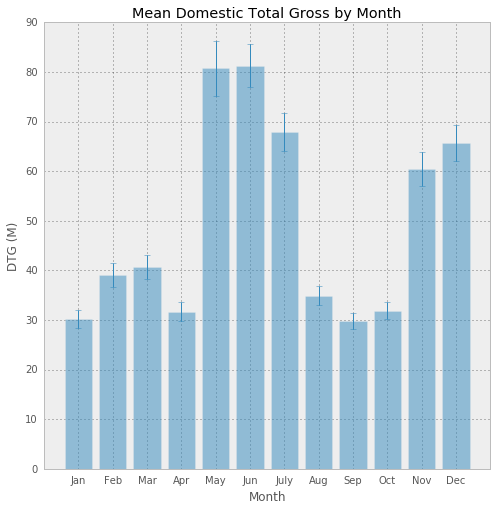

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
ind = np.arange(1, len(month_df2.index)+1)
ax.bar(month_df2.index, month_df2.dtg.values/1000000, align='center', alpha=0.5, yerr=month_sem/1000000)
# std dev = month_std_df2.dtg.values/1000000
ax.set_xticks(ind)
ax.set_xticklabels( ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] )
plt.xlim(xmin=0, xmax=13)
plt.title('Mean Domestic Total Gross by Month')
plt.ylabel('DTG (M)')
plt.xlabel('Month')
plt.show()

In [29]:
data_start[data_start['rdm']=='March'].sort_values('dtg', ascending=False)

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
13,The Hunger Games,408010692,Lionsgate,2012-03-23,142,PG-13,$78 million,152535747,"4,137",9,Yes,March,2012
132,Zootopia,340984985,Buena Vista,2016-03-04,108,PG,NaN,75063401,"3,827",9,No,March,2016
36,Alice in Wonderland (2010),334191110,Buena Vista,2010-03-05,109,PG,$200 million,116101023,"3,728",8,No,March,2010
12,Batman v Superman: Dawn of Justice,330360194,Warner Bros.,2016-03-25,151,PG-13,$250 million,166007347,"4,242",11,Yes,March,2016
109,Oz The Great and Powerful,234911825,Buena Vista,2013-03-08,127,PG,$215 million,79110453,"3,912",7,No,March,2013
353,How to Train Your Dragon,217581231,Paramount (DreamWorks),2010-03-26,98,PG,$165 million,43732319,"4,055",7,Yes,March,2010
125,Dr. Seuss' The Lorax,214030500,Universal,2012-03-02,95,PG,$70 million,70217070,"3,729",6,No,March,2012
96,300,210614939,Warner Bros.,2007-03-09,117,R,$65 million,70885301,"3,103",6,No,March,2007
149,Cinderella (2015),201151353,Buena Vista,2015-03-13,112,PG,$95 million,67877361,"3,845",6,No,March,2015
174,Monsters Vs. Aliens,198351526,Paramount (DreamWorks),2009-03-27,94,PG,$175 million,59321095,"4,104",11,No,March,2009


In [30]:
data_start[data_start['rdm']=='March'].describe()

,dtg,run,owg,act
count,442.00,442.00,442.00,442.00
mean,40639045.94,104.69,12105487.21,3.03
std,51072059.46,14.98,16809604.04,2.72
min,508326.00,74.00,223789.00,0.00
25%,11362960.25,95.00,3525452.00,1.00
50%,23850912.50,102.00,6417591.50,2.00
75%,51121624.75,112.00,14037536.75,5.00
max,408010692.00,172.00,166007347.00,16.00


**Other Below**

In [50]:
data_start.sort_values( ['rdy'], ascending=False ).describe()

,dtg,run,owg,act
count,4662.00,4662.00,4662.00,4662.00
mean,49654769.06,106.66,13250519.78,3.39
std,64164326.94,17.99,18445315.52,3.05
min,131357.00,44.00,96076.00,0.00
25%,12720194.00,95.00,3607208.00,1.00
50%,28577830.00,104.00,7217190.50,3.00
75%,60058878.50,116.00,15165165.00,5.00
max,936662225.00,229.00,247966675.00,27.00


In [55]:
pd.pivot_table(data_start[data_start['rdy']=='2015'] , values=['dtg'], index=['rating'] )

,dtg
rating,
G,73305366
PG,89471982
PG-13,92626809
R,39625305
